# C3BO: Cancer Blood Oncologist

### Necessary Imports

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob
import os

from skimage.io import imread, imshow

from skimage.transform import resize
from sklearn.utils import shuffle
from tqdm import tqdm

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

### File Handling

In [20]:
train_dataset_0_all = glob.glob('C-NMC_Leukemia/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('C-NMC_Leukemia/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('C-NMC_Leukemia/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('C-NMC_Leukemia/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('C-NMC_Leukemia/training_data/fold_2/hem/*.bmp')

In [21]:
print(imread(train_dataset_0_all[0]).shape)

(450, 450, 3)


In [22]:
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255, validation_split=0.25)

In [23]:
train_dataset = train.flow_from_directory('C-NMC_Leukemia/training_data/fold_0',
                                         target_size=(200, 200),
                                         batch_size=10,
                                         class_mode="binary")

Found 3527 images belonging to 2 classes.


In [24]:
labels_df = pd.read_csv("C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")
labels_df.head()

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,1.bmp,1
1,UID_57_22_2_all.bmp,2.bmp,1
2,UID_57_31_3_all.bmp,3.bmp,1
3,UID_H49_35_1_hem.bmp,4.bmp,0
4,UID_58_6_13_all.bmp,5.bmp,1


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation="relu"),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(lr=0.001),
             metrics=["accuracy"])

In [27]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=5,
                     epochs=10,)

Epoch 1/10
5/5 [==============================] - 6s 875ms/step - loss: 0.7685 - accuracy: 0.4672
Epoch 2/10
5/5 [==============================] - 5s 918ms/step - loss: 0.6063 - accuracy: 0.7419
Epoch 3/10
5/5 [==============================] - 4s 748ms/step - loss: 0.6017 - accuracy: 0.7008
Epoch 4/10
5/5 [==============================] - 4s 732ms/step - loss: 0.4155 - accuracy: 0.8019
Epoch 5/10
5/5 [==============================] - 4s 755ms/step - loss: 0.4105 - accuracy: 0.7742
Epoch 6/10
5/5 [==============================] - 4s 814ms/step - loss: 0.3514 - accuracy: 0.8522
Epoch 7/10
5/5 [==============================] - 4s 717ms/step - loss: 0.4622 - accuracy: 0.7456
Epoch 8/10
5/5 [==============================] - 3s 658ms/step - loss: 0.4229 - accuracy: 0.8249
Epoch 9/10
5/5 [==============================] - 3s 659ms/step - loss: 0.4737 - accuracy: 0.8694
Epoch 10/10
5/5 [==============================] - 4s 782ms/step - loss: 0.4340 - accuracy: 0.8739


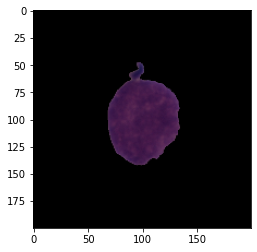

1


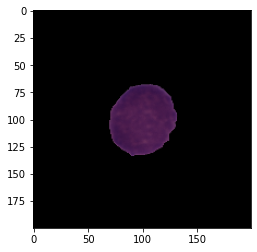

1


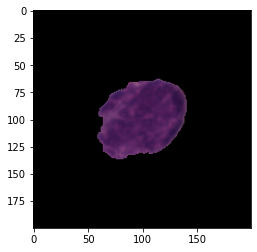

1


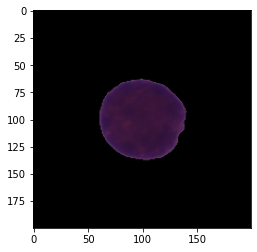

1


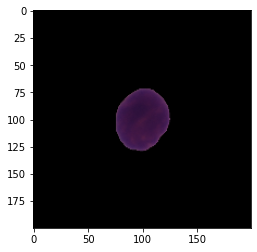

1


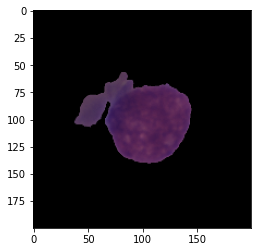

0


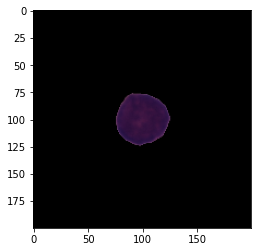

1


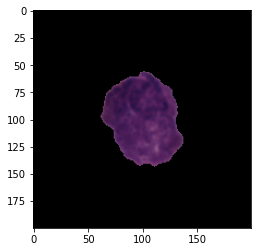

1


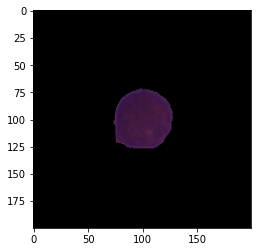

1


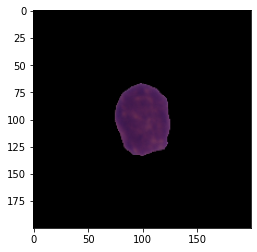

1


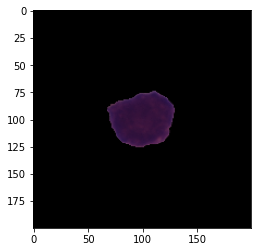

1


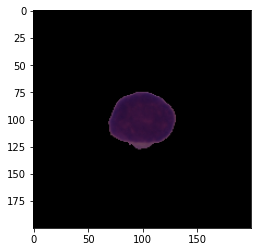

1


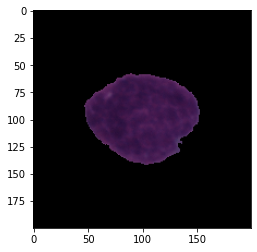

0


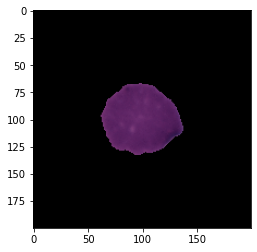

1


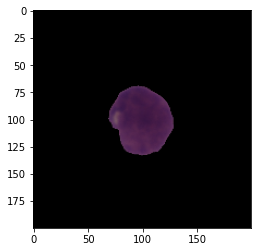

1


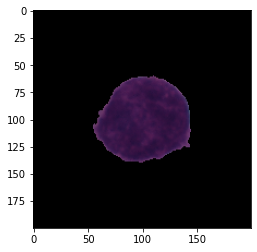

0


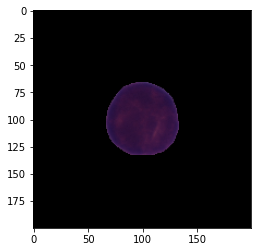

1


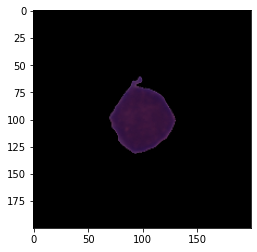

1


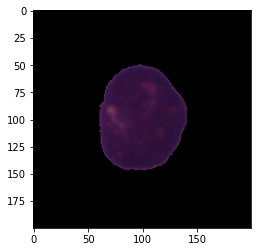

0


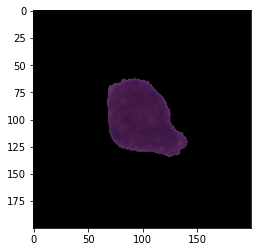

1


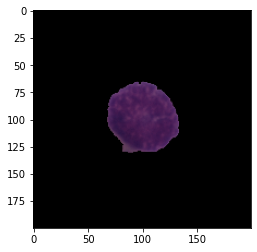

1


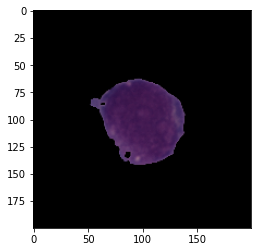

1


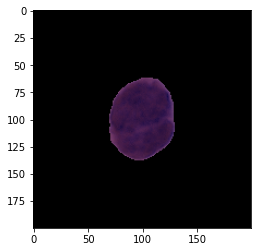

1


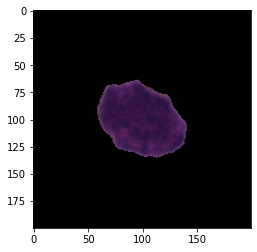

1


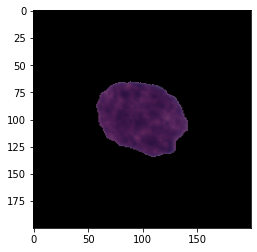

1


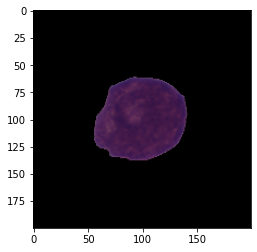

0


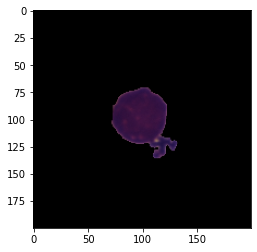

1


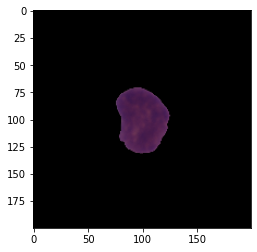

1


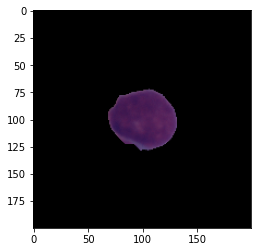

1


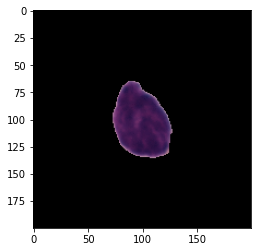

1


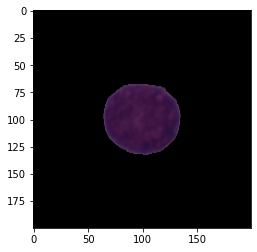

1


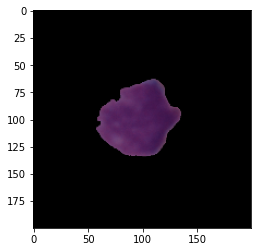

1


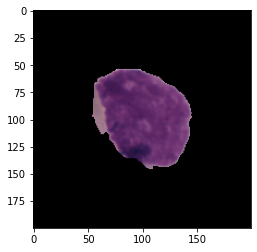

0


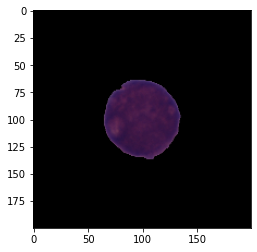

1


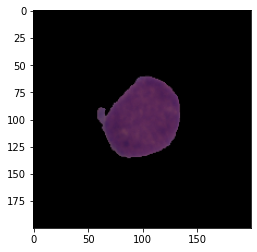

1


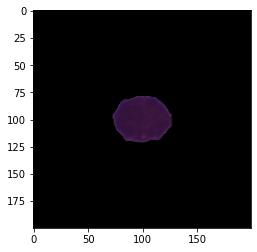

1


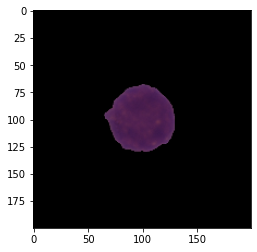

1


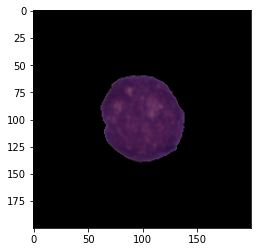

1


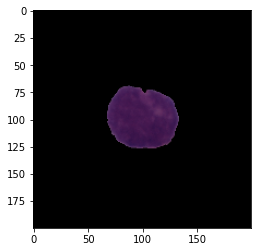

1


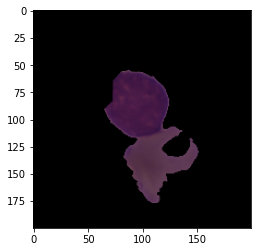

0


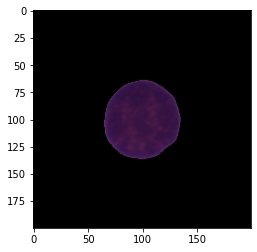

1


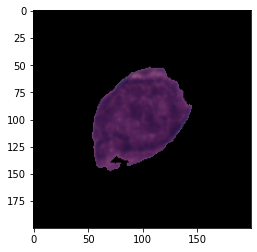

0


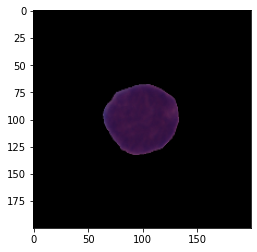

1


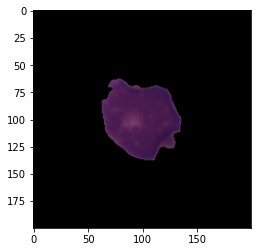

1


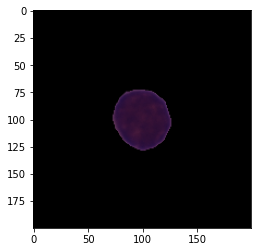

1


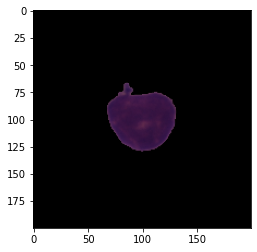

1


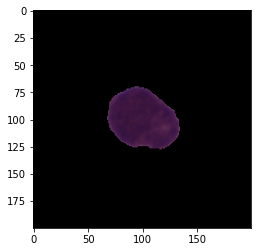

1


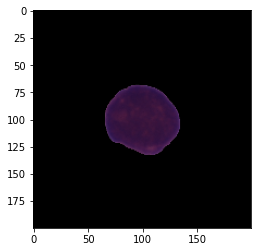

1


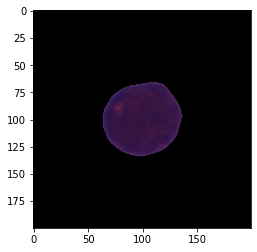

1


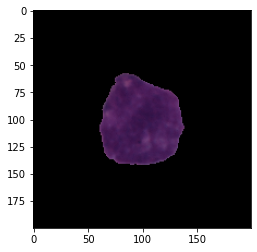

0


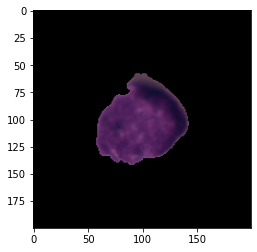

0


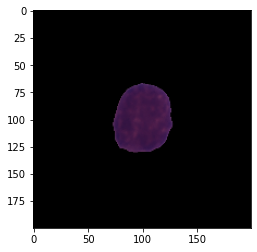

1


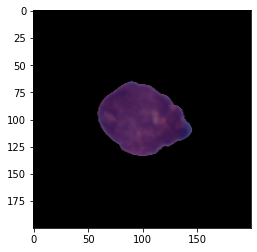

1


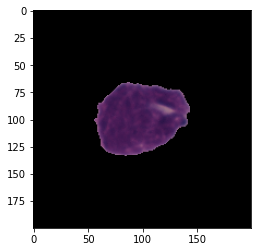

1


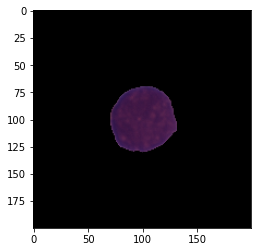

1


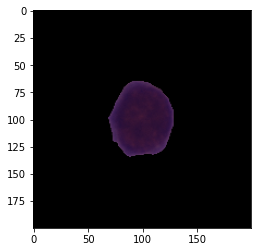

1


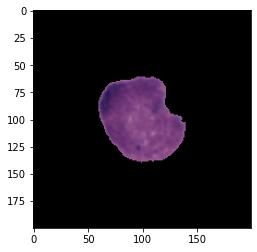

1


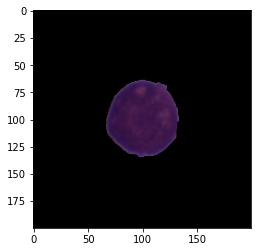

1


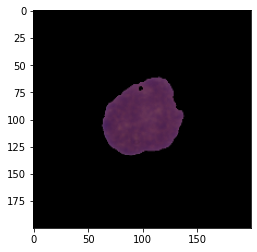

1


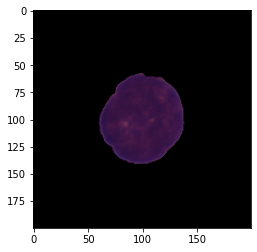

1


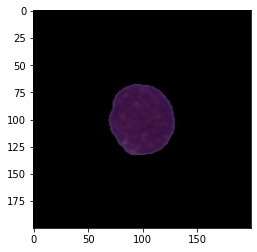

1


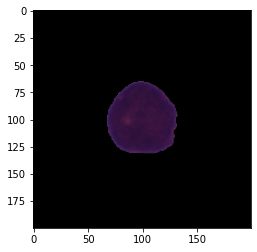

1


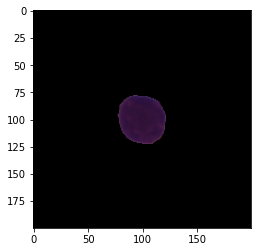

1


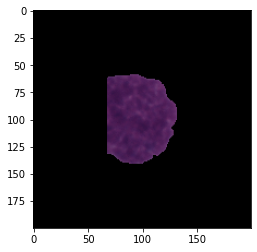

1


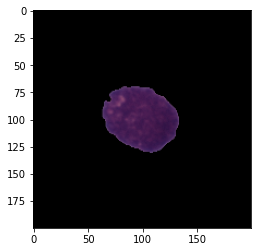

1


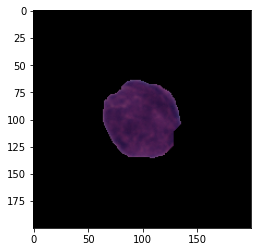

1


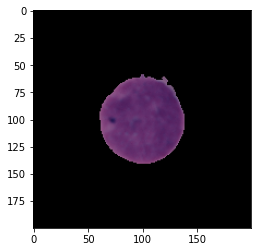

0


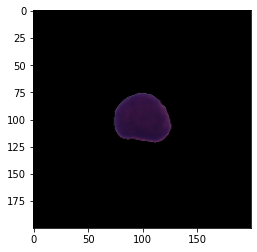

1


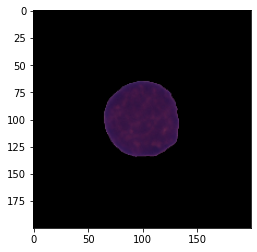

1


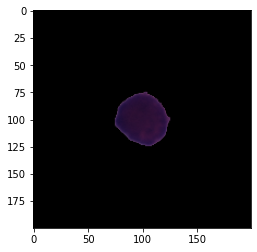

1


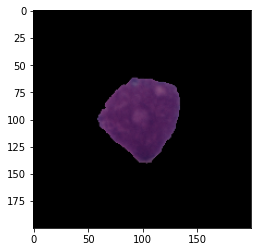

1


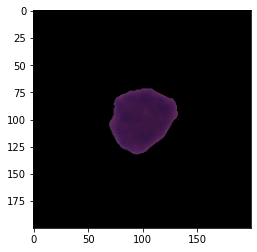

1


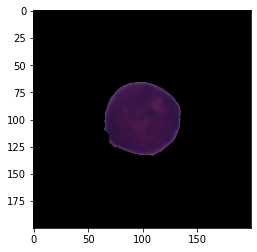

1


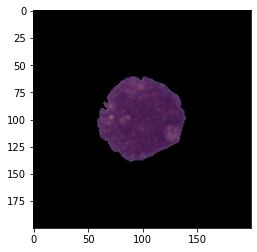

1


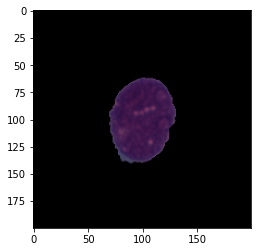

1


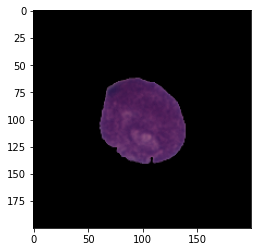

1


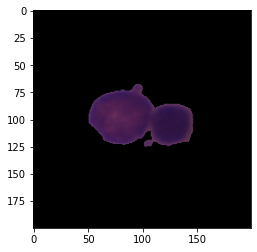

0


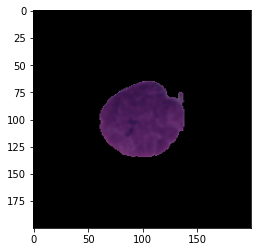

1


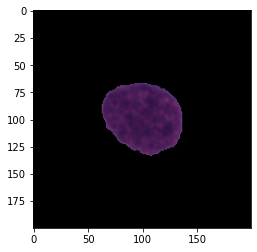

1


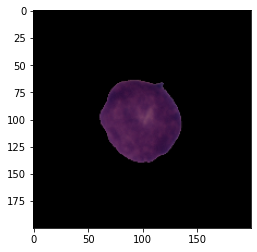

1


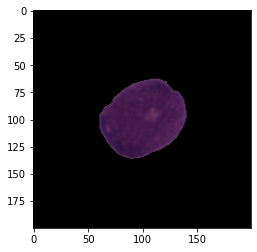

1


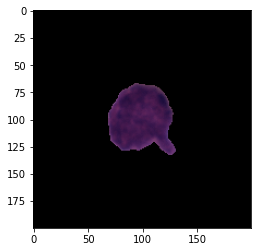

1


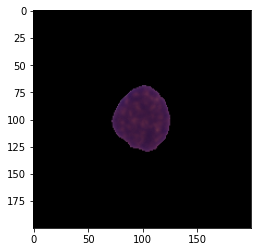

1


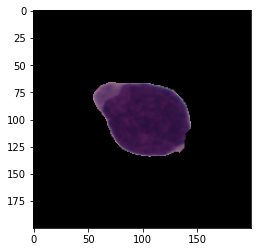

1


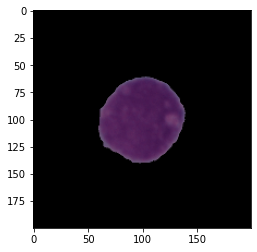

1


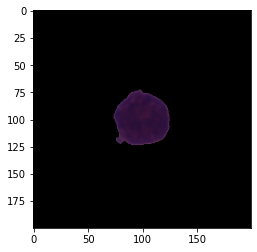

1


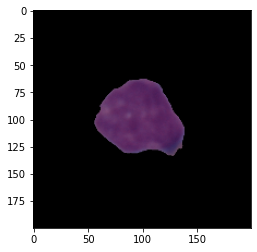

1


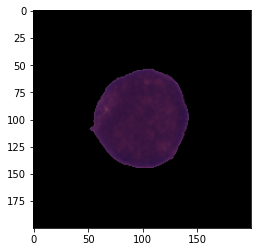

0


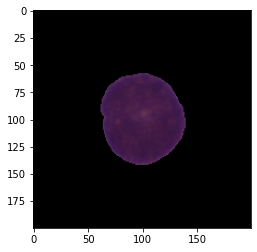

0


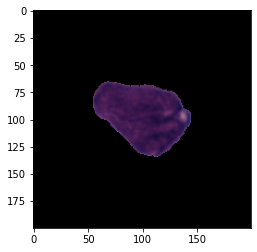

1


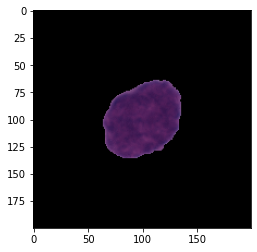

1


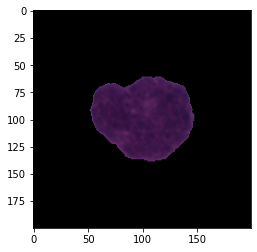

0


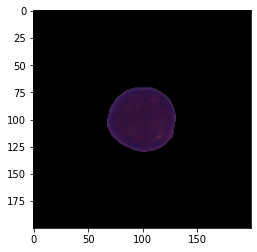

1


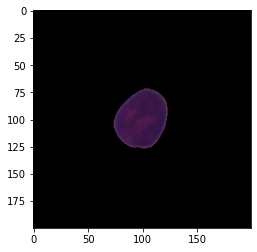

1


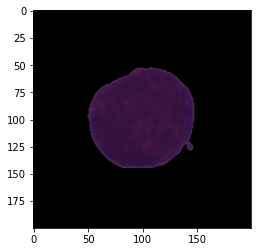

0


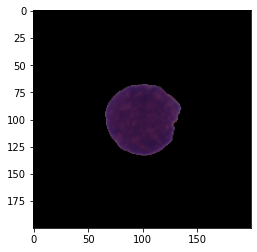

1


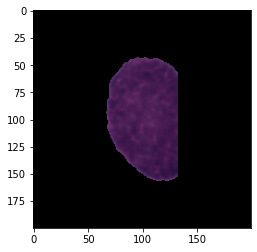

0


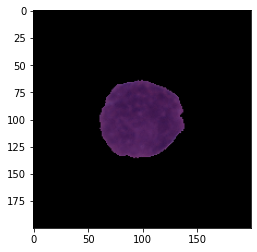

1


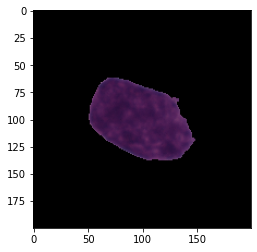

0


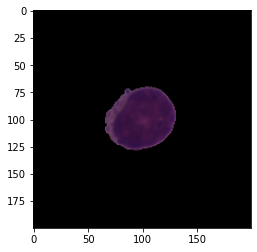

1


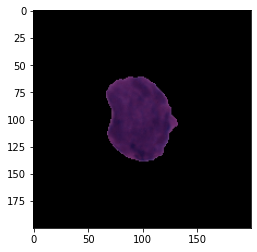

1


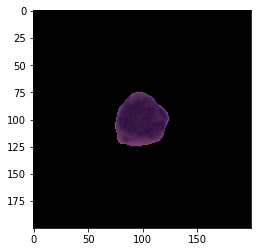

1


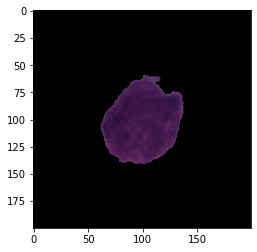

1


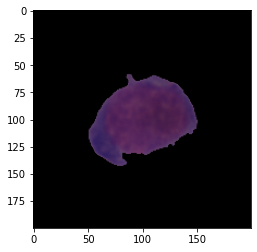

0


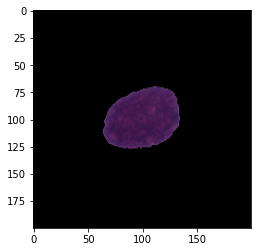

1


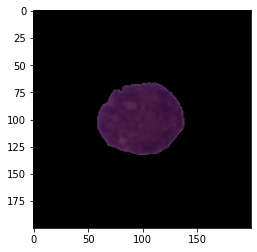

1


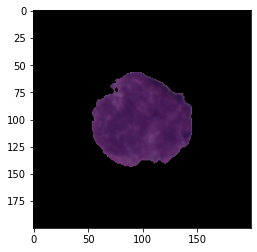

0


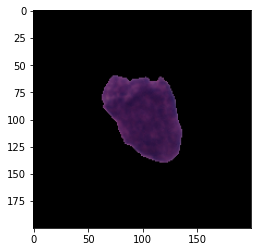

1


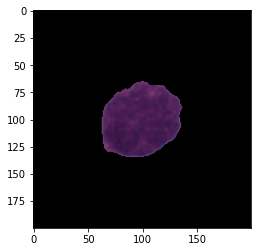

1


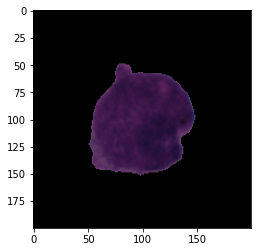

0


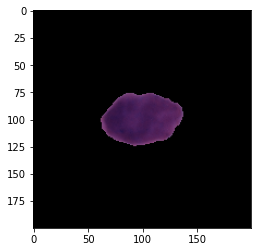

1


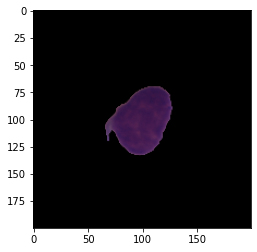

1


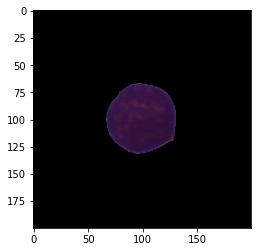

1


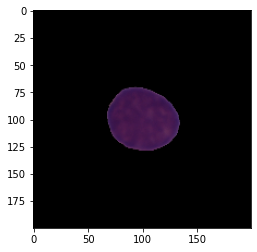

1


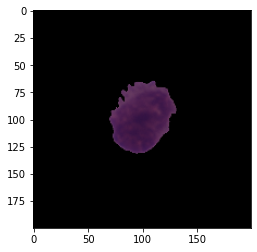

1


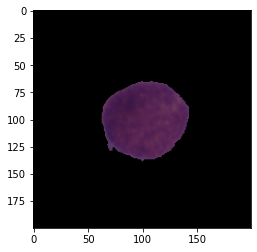

1


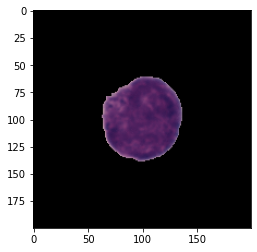

1


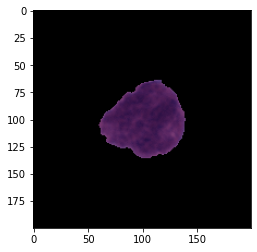

1


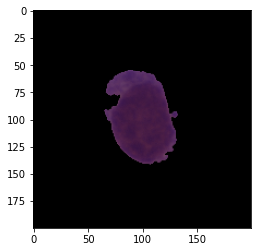

1


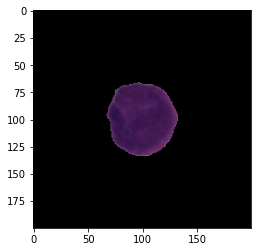

1


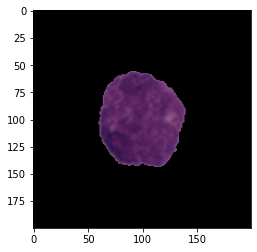

0


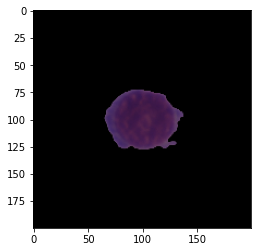

1


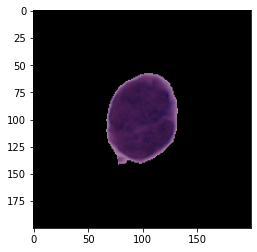

1


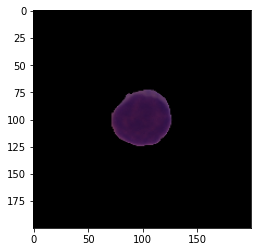

1


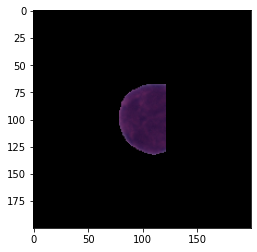

1


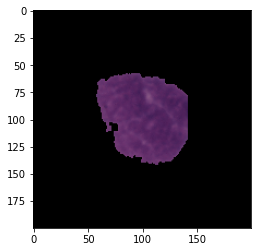

0


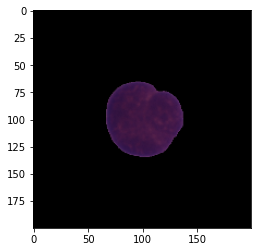

1


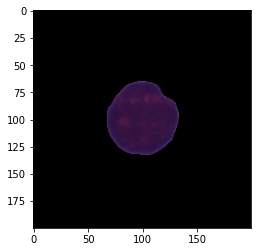

1


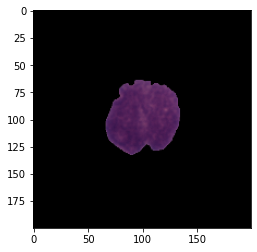

1


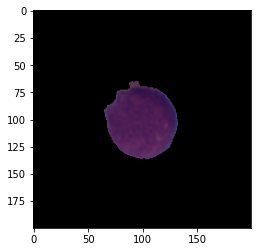

1


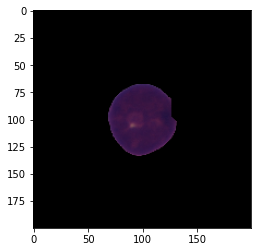

1


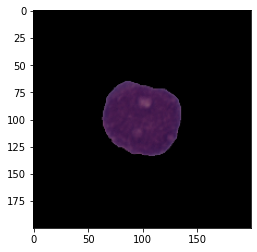

1


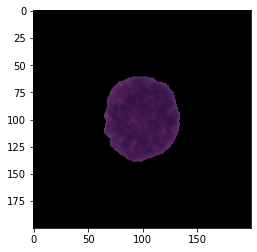

1


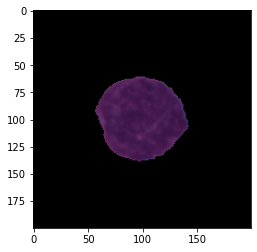

0


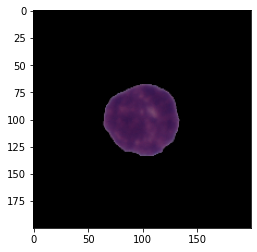

1


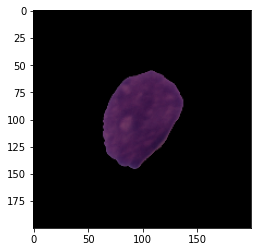

0


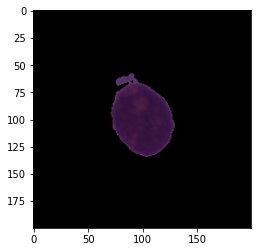

1


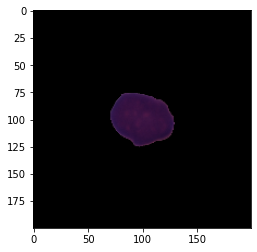

1


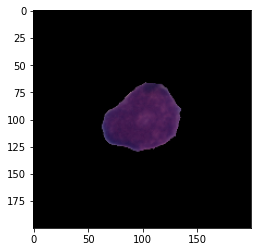

1


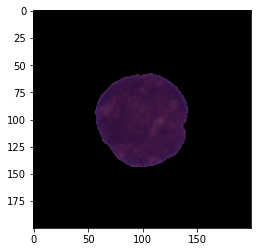

0


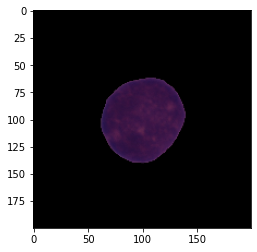

1


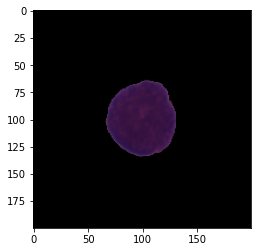

1


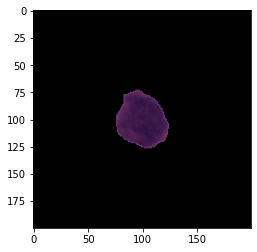

1


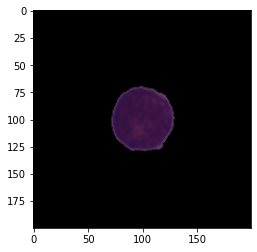

1


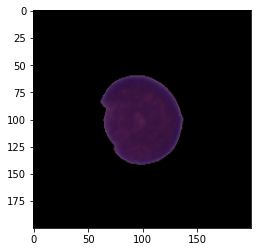

1


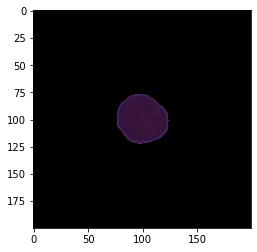

1


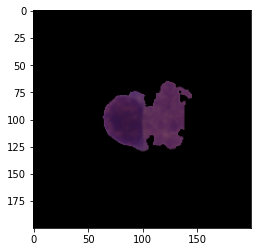

1


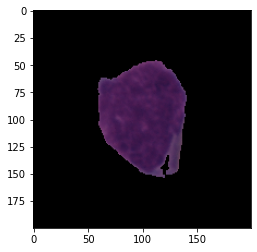

0


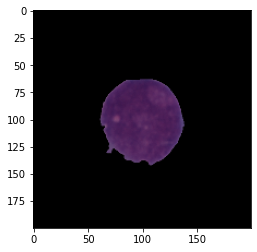

1


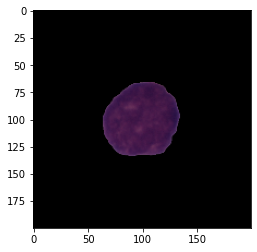

1


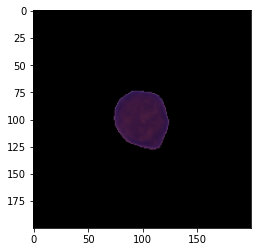

1


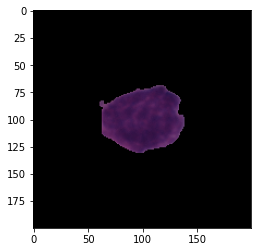

1


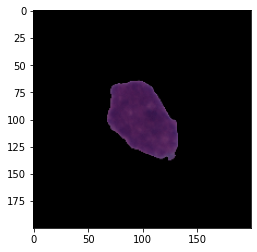

1


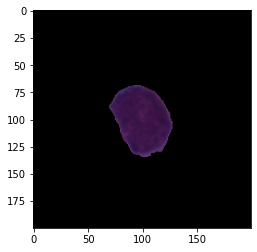

1


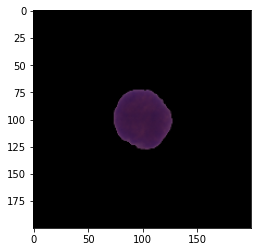

1


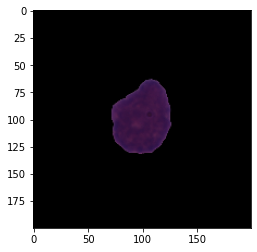

1


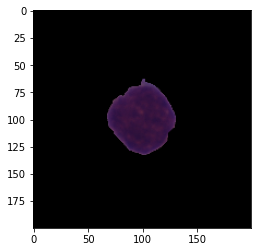

1


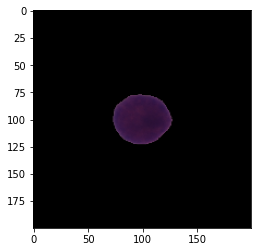

1


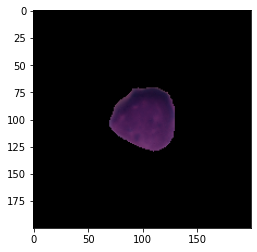

1


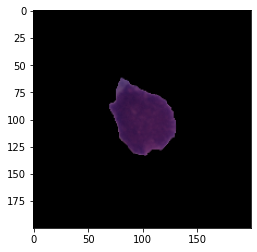

1


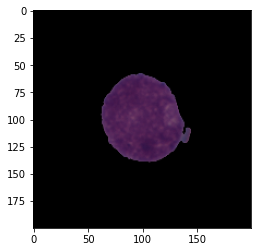

1


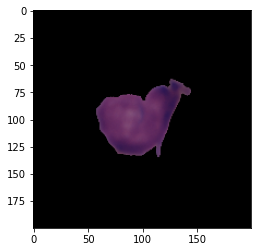

1


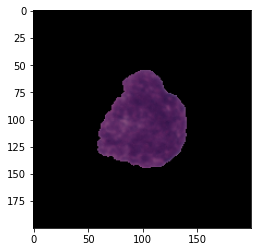

0


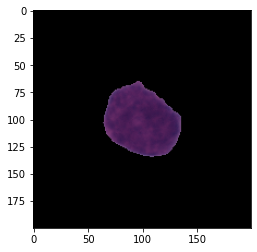

1


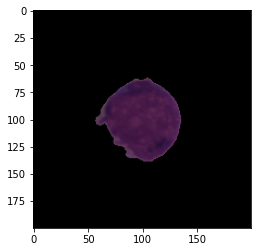

1


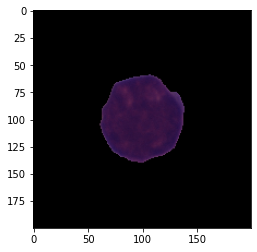

1


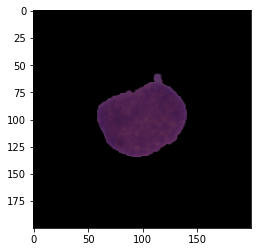

1


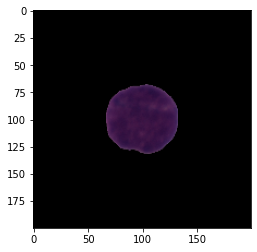

1


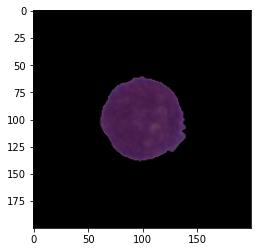

1


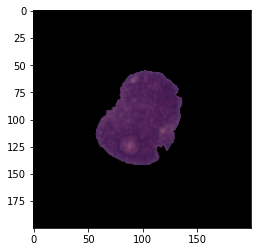

0


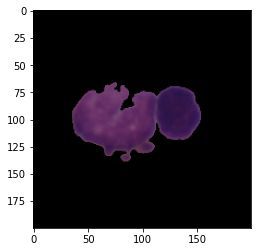

0


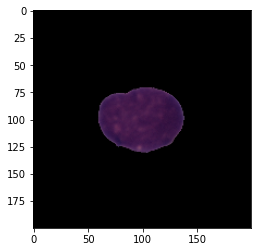

1


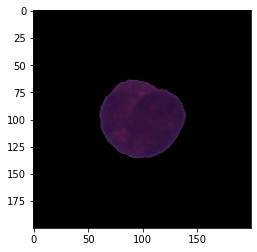

1


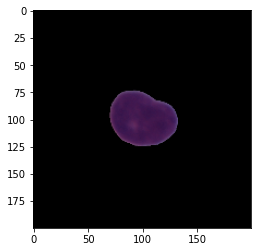

1


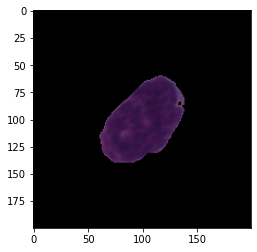

0


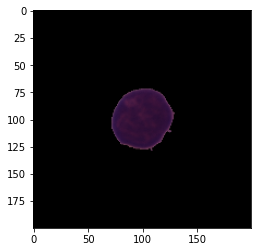

1


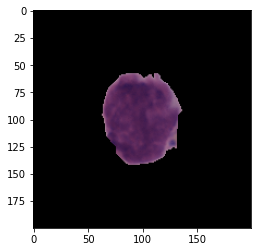

0


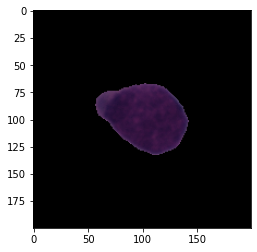

1


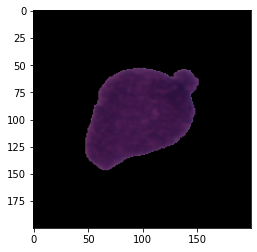

0


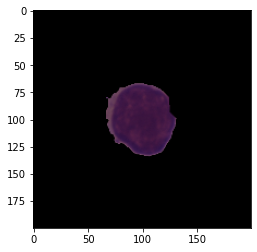

1


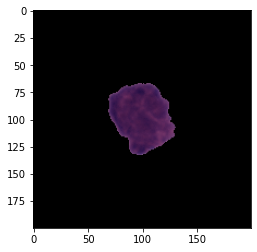

1


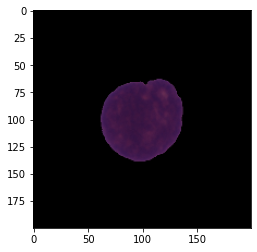

1


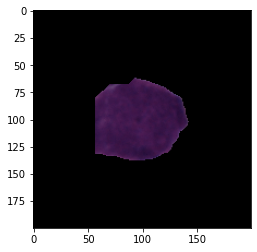

0


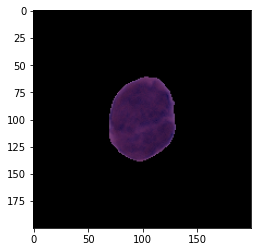

1


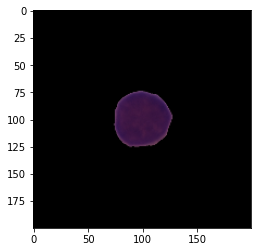

1


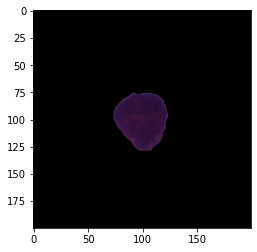

1


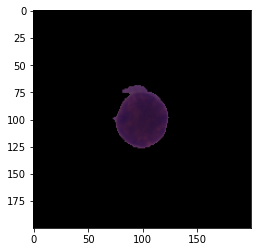

1


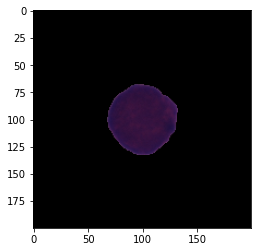

1


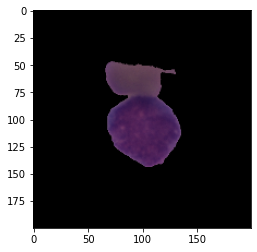

0


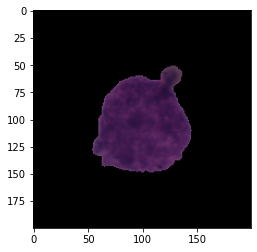

0


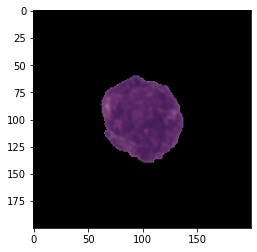

1


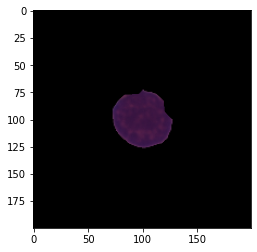

1


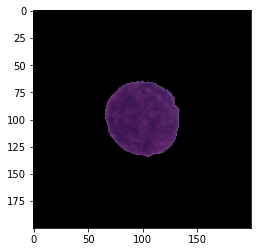

1


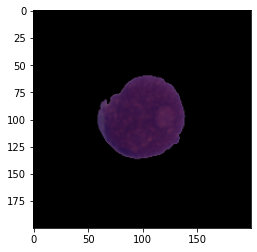

1


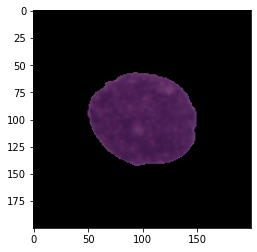

0


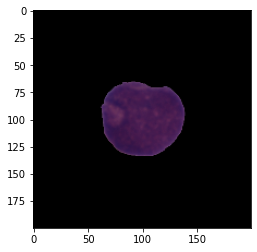

1


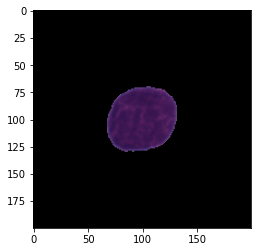

1


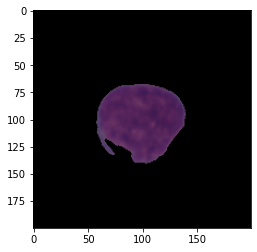

1


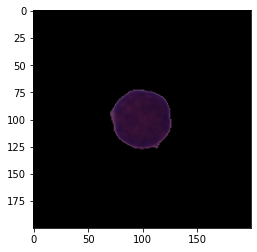

1


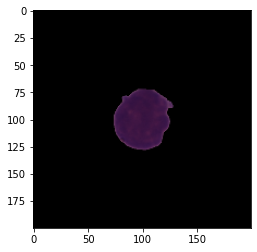

1


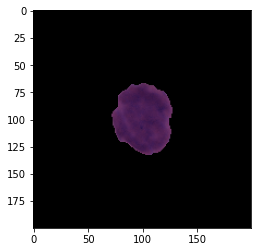

1


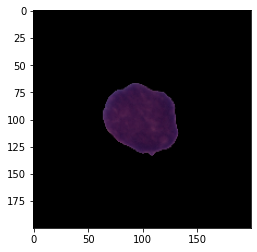

1


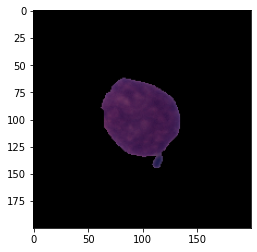

1


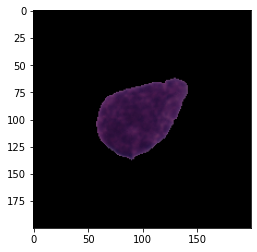

1


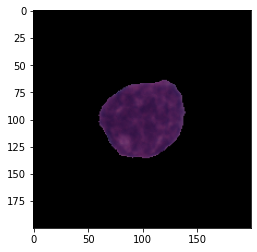

1


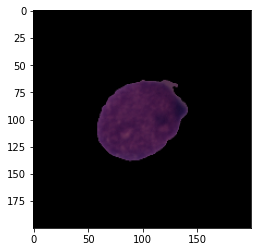

1


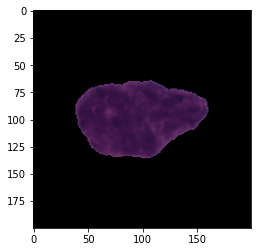

0


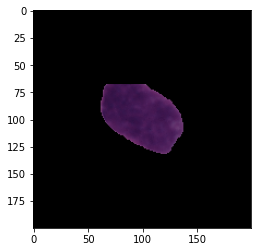

1


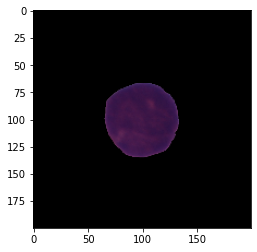

1


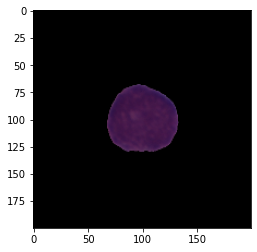

1


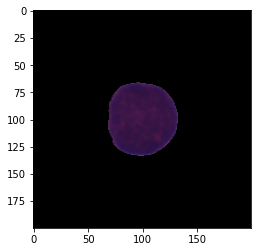

1


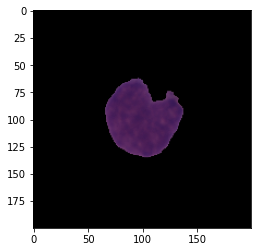

1


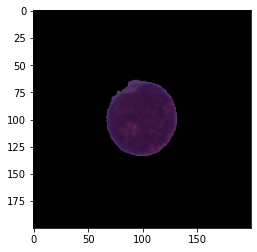

1


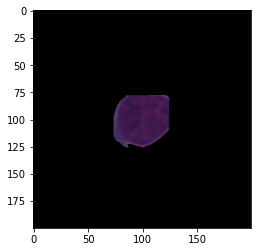

1


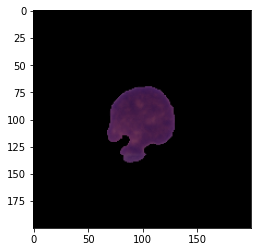

1


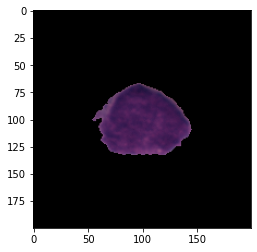

1


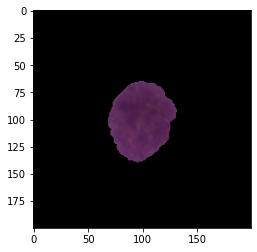

1


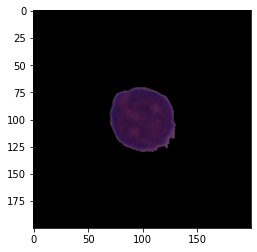

1


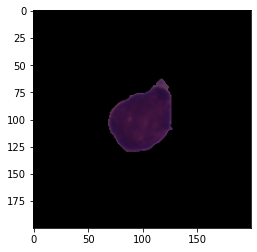

1


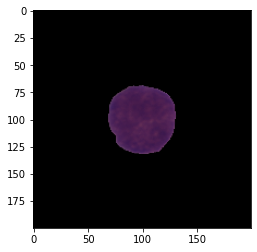

1


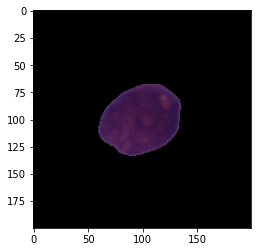

1


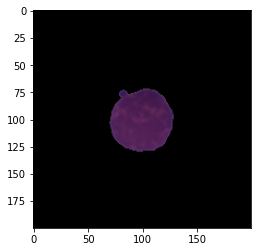

1


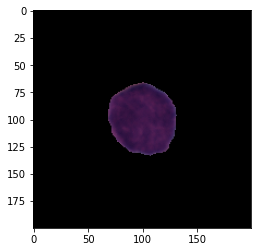

1


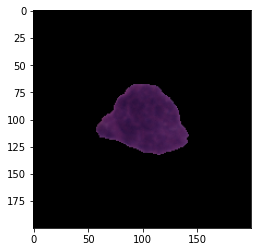

1


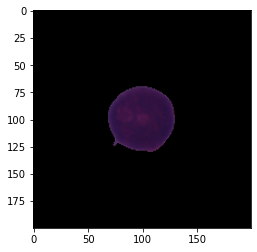

1


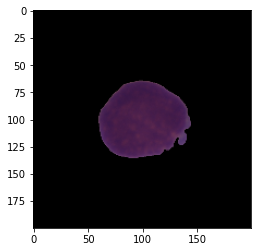

1


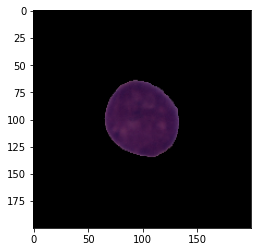

1


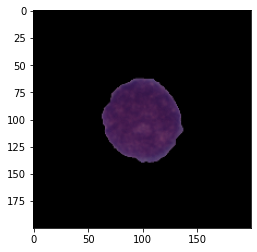

1


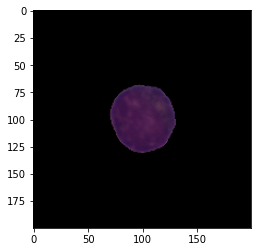

1


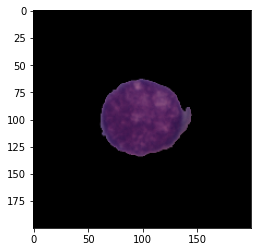

1


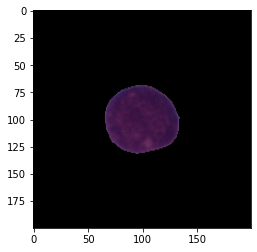

1


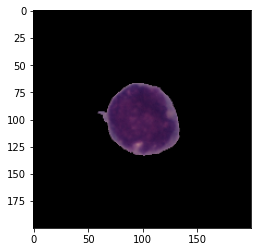

1


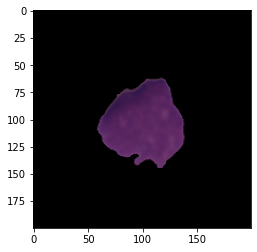

0


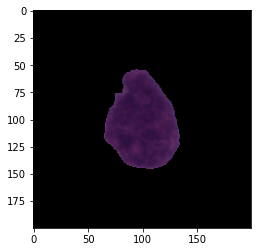

KeyboardInterrupt: 

In [29]:
dir_path = "C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + "//" + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Benign")
    else:
        print("Malignant")


In [30]:
train_dataset.class_indices

{'all': 0, 'hem': 1}